In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
electrical_grid_stability_simulated_data = fetch_ucirepo(id=471) 
  
# data (as pandas dataframes) 
X = electrical_grid_stability_simulated_data.data.features 
y = electrical_grid_stability_simulated_data.data.targets 
# convert target to binary
y['stabf'] = y['stabf'].map({'stable': 1, 'unstable': 0})

# metadata 
print(electrical_grid_stability_simulated_data.metadata) 
  
# variable information 
print(electrical_grid_stability_simulated_data.variables) 


{'uci_id': 471, 'name': 'Electrical Grid Stability Simulated Data ', 'repository_url': 'https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data', 'data_url': 'https://archive.ics.uci.edu/static/public/471/data.csv', 'abstract': 'The local stability analysis of the 4-node star system (electricity producer is in the center) implementing Decentral Smart Grid Control concept. ', 'area': 'Physics and Chemistry', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 10000, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['stab', 'stabf'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Tue Jan 09 2024', 'dataset_doi': '10.24432/C5PG66', 'creators': ['Vadim Arzamasov'], 'intro_paper': None, 'additional_info': {'summary': "The analysis is performed for different sets of input values using the methodology similar to

/tmp/ipykernel_1039/1383899631.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['stabf'] = y['stabf'].map({'stable': 1, 'unstable': 0})


In [2]:
# split the data in 4

from sklearn.model_selection import train_test_split
RANDOM_STATE=777
X1, y1 = X[:2500], y['stabf'][:2500]
X2, y2 = X[2500:5000], y['stabf'][2500:5000]
X3, y3 = X[5000:7500], y['stabf'][5000:7500]
X4, y4 = X[7500:], y['stabf'][7500:]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=RANDOM_STATE)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=RANDOM_STATE)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=RANDOM_STATE)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=RANDOM_STATE)
title1, title2, title3, title4 = 'X1', 'X2', 'X3', 'X4'

In [3]:
import random

def my_train_test_split(X,y,test_size=0.2, ignore_size=0.25, random_state=777):
    random.seed(random_state)  # Set the random seed
    n = round(len(X)*test_size)  # Number of random numbers
    start = round(len(X)*ignore_size)  # Start of range
    end = len(X)-1  # End of range

    random_numbers = random.sample(range(start, end + 1), n)
    all_numbers = set(range(start, end + 1))
    remaining_numbers = list(all_numbers - set(random_numbers))

    X_train, X_test = X.iloc[remaining_numbers], X.iloc[random_numbers]
    y_train, y_test = y.iloc[remaining_numbers], y.iloc[random_numbers]

    return X_train, X_test, y_train, y_test


In [ ]:
# pick a test set that ignores the first 25% of dataset values
# save those test indices
# run fracdiff on entire dataset
# recreate the new post-fd test set using the saved indices

# for non fd
# pick a test set that ignores the first 25% of dataset values
    # use randomstate to produce a list of indices aside from the first 25% of the dataset
    # use those indices to select the test set
# carry on as normal


# Prelim plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# combine the features and target
for col in X.columns:
    X[col].plot()
    plt.show()

In [4]:
y['stabf'].value_counts()

stabf
unstable    6380
stable      3620
Name: count, dtype: int64

ADF Statistic: -99.429141
p-value: 0.000000
tau1


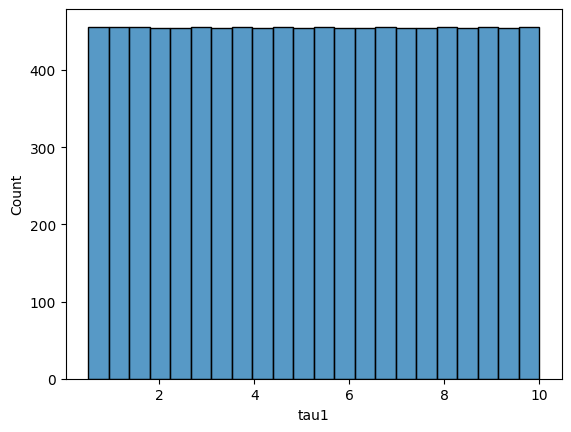

ADF Statistic: -99.742273
p-value: 0.000000
tau2


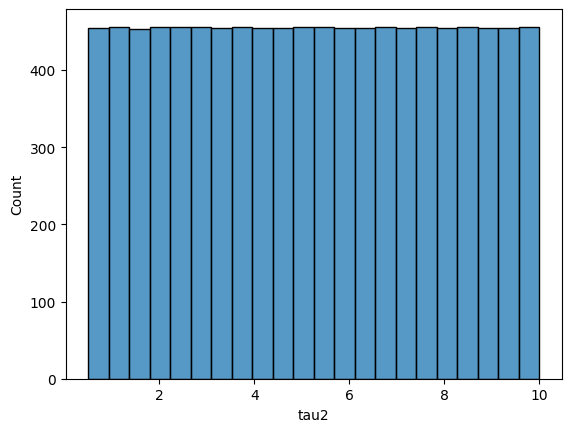

ADF Statistic: -98.297231
p-value: 0.000000
tau3


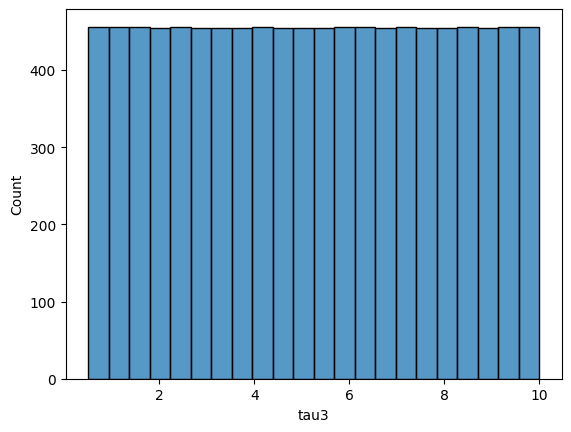

ADF Statistic: -99.289040
p-value: 0.000000
tau4


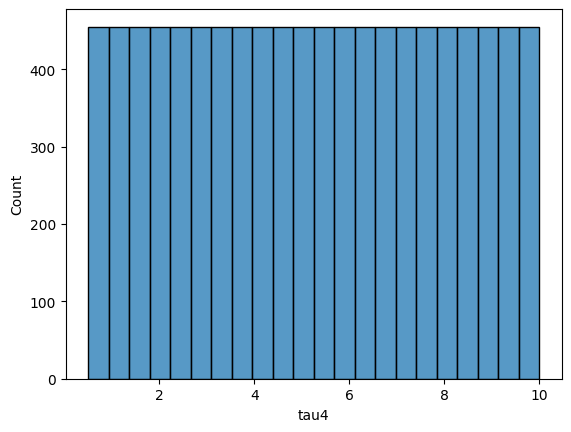

ADF Statistic: -98.013660
p-value: 0.000000
p1


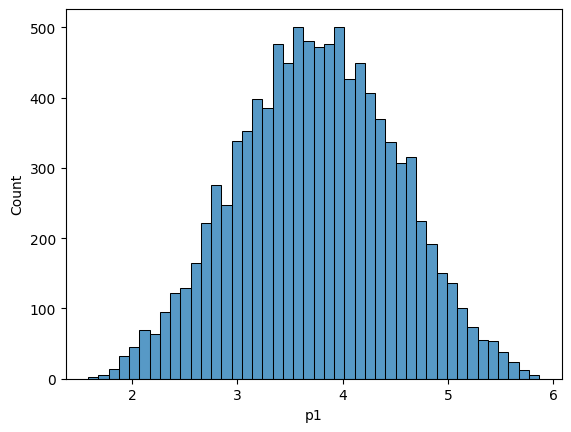

ADF Statistic: -38.861445
p-value: 0.000000
p2


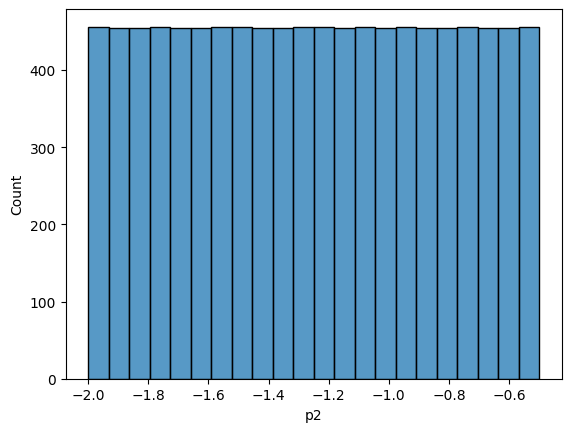

ADF Statistic: -99.277040
p-value: 0.000000
p3


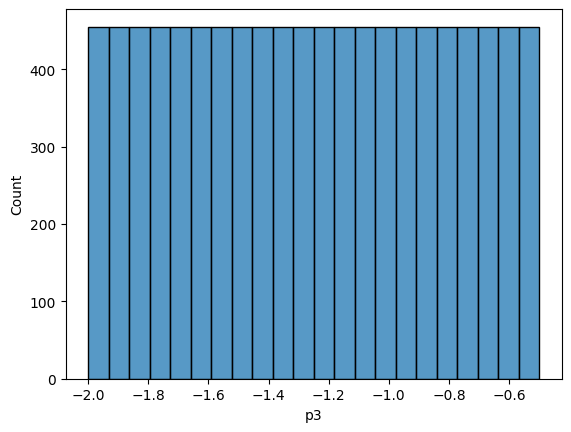

ADF Statistic: -69.414296
p-value: 0.000000
p4


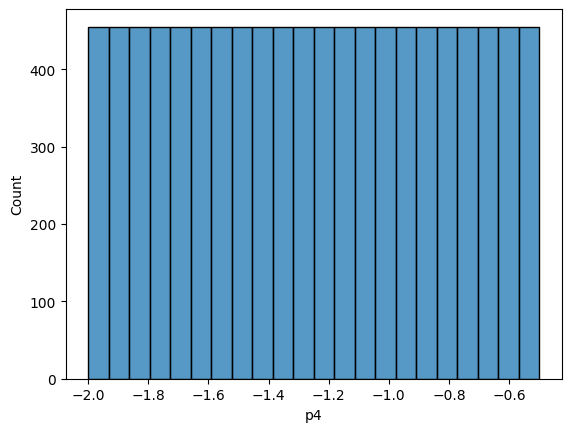

ADF Statistic: -100.503138
p-value: 0.000000
g1


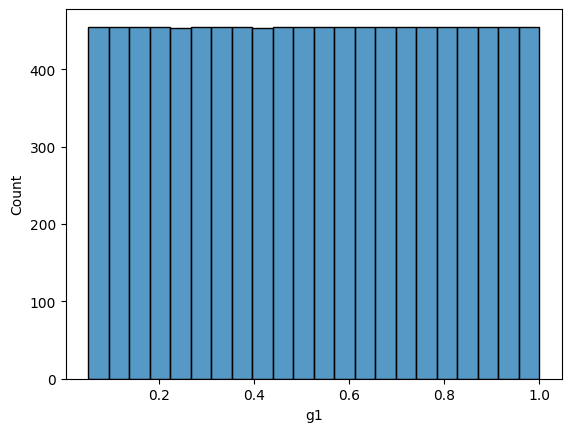

ADF Statistic: -69.185259
p-value: 0.000000
g2


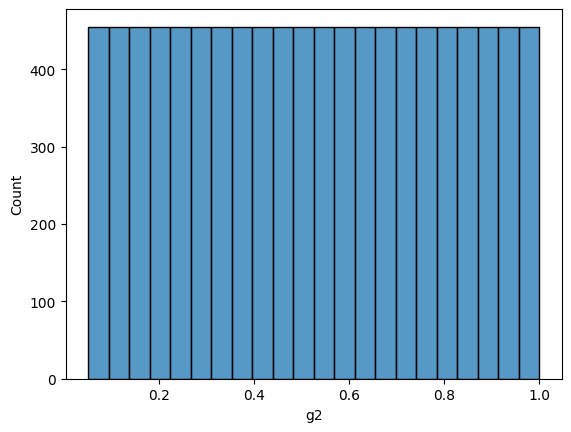

ADF Statistic: -98.661938
p-value: 0.000000
g3


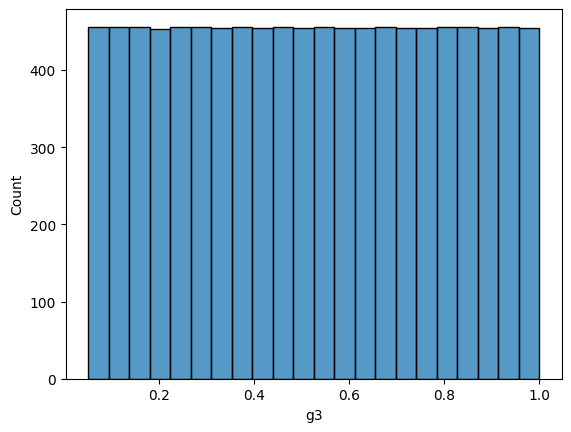

ADF Statistic: -99.897775
p-value: 0.000000
g4


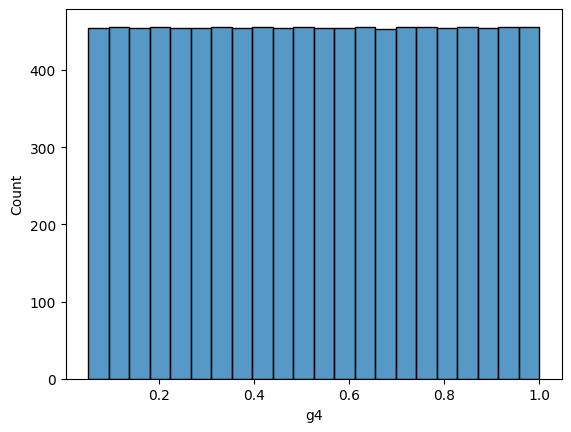

In [9]:
# plot each variable in X
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

for i in X.columns:
    # calculate the stationarity of each column as well using adfuller
    result = adfuller(X[i])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print(i)

    sns.histplot(X[i])
    plt.show() 
    plt.close()
    

# Run framework

Given a list of datasets (train test splits of X and y) and corresponding list of dataset titles: run all of the resulting adaptation and consolidation experiments 

In [3]:
%load_ext autoreload
%autoreload 2

In [57]:
y1_test.index - 50

Index([1493, 2086,  380, 2091,  441, 1812,  707, 1489, 1499,  860,
       ...
        -45,  243, 1035,  802, 1083, 2412, 1942, 2194,  -48,  429],
      dtype='int64', length=500)

In [4]:
import random
import time
import pandas as pd
from rocket_functions import generate_kernels, apply_kernels
from fracdiff import frac_diff_bestd
from evaluator import Evaluator

def my_train_test_split(X,y,test_size=0.2, ignore_size=0.25, random_state=777):
    # a train test split that does not randomly pull from the first 25% of data
    # because frac diff will drop values and we want the same test sets for with and without frac diff
    random.seed(random_state)  # Set the random seed
    n = round(len(X)*test_size)  # Number of random numbers
    start = round(len(X)*ignore_size)  # Start of range
    end = len(X)-1  # End of range

    random_numbers = random.sample(range(start, end + 1), n)
    all_numbers = set(range(start, end + 1))
    remaining_numbers = list(all_numbers - set(random_numbers))

    X_train, X_test = X.iloc[remaining_numbers], X.iloc[random_numbers]
    y_train, y_test = y.iloc[remaining_numbers], y.iloc[random_numbers]

    return X_train, X_test, y_train, y_test

def train_test_split_by_indices(X,y,test_indices, num_dropped=0):
    test_indices = test_indices - num_dropped
    # print(f'test_indices: {test_indices.min()} - {test_indices.max()}')
    # print(f'X: {X.index.min()} - {X.index.max()}')
    # print(f'y: {y.index.min()} - {y.index.max()}')
    X_test = X.loc[test_indices]
    y_test = y.loc[test_indices]
    X_train = X.drop(test_indices)
    y_train = y.drop(test_indices)
    return X_train, X_test, y_train, y_test

def run_measurements(datasets, titles, dataset_name, model_name, num_runs=10, test_size=None, frac_diff=False, rocket=False):

    # PREPROCESSING -------------------------------------------------------------------------------------------------

    # train test split for each episode

    episodes = []
    for X,y in datasets:
        X_train, X_test, y_train, y_test = my_train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
        episode = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test, 'X': X, 'y': y}
        episodes.append(episode)

    # Frac Diff
    if frac_diff:
        new_episodes = []
        for i, episode in enumerate(episodes):
            start = time.perf_counter()
            X, fd_change_pct = frac_diff_bestd(episode['X'])
            end = time.perf_counter()
            X.dropna(inplace=True)
            y = episode['y'].iloc[:len(X)]
            drop_pct = 1 - len(X) / len(episode['X'])
            time_taken_mins = (end-start)/60
            # ensure the test set is the same as without frac diff
            X_train, X_test, y_train, y_test = train_test_split_by_indices(X, y, episode['y_test'].index, num_dropped=0) # len(episode['X'])-len(X)
            # pack new episode, along with some frac diff info
            new_episode = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test, 'X': X, 'y': y, 'fd_change_pct': fd_change_pct, 'drop_pct': drop_pct, 'fd_time_taken_mins': time_taken_mins}
            new_episodes.append(new_episode)
        episodes = new_episodes

    # Rocket
    if rocket:
        for i, episode in enumerate(episodes):
                input_length = episode['X_train'].shape[-1]
                kernels = generate_kernels(input_length, 10_000)
                start = time.perf_counter()
                X_train = apply_kernels(episode['X_train'].to_numpy(), kernels)
                X_test = apply_kernels(episode['X_test'].to_numpy(), kernels)
                end = time.perf_counter()

                time_taken_mins = (end-start)/60
                episode['X_train'] = pd.DataFrame(X_train)
                episode['X_test'] = pd.DataFrame(X_test)
                episode['rocket_time_taken_mins'] = time_taken_mins
    
    # Pack the preprocessing info
    prep_info = {}
    if frac_diff:
        prep_info['frac_diff'] = True
        prep_info['fd_change_pct'] = [ep['fd_change_pct'] for ep in episodes]
        prep_info['drop_pct'] = [ep['drop_pct'] for ep in episodes]
        prep_info['fd_time_taken_mins'] = [ep['fd_time_taken_mins'] for ep in episodes]
    if rocket:
        prep_info['rocket'] = True
        prep_info['rocket_time_taken_mins'] = [ep['rocket_time_taken_mins'] for ep in episodes]

    # EVALUATION -------------------------------------------------------------------------------------------------

    eval = Evaluator(dataset_name, model_name, num_runs, test_size)

    # ADAPTATION MEASURE LOOP 

    adaptation_results = pd.DataFrame()
    for i in range(1, len(episodes)):
        trained_on1 = episodes[:i+1]
        trained_on2 = episodes[:i]
        test = episodes[i]
        trained_on1_titles = titles[:i+1]
        trained_on2_titles = titles[:i]
        test_title = titles[i]

        result = eval.adaptation_measure(
            [ep['X_train'] for ep in trained_on1], 
            [ep['y_train'] for ep in trained_on1], 
            [ep['X_train'] for ep in trained_on2],
            [ep['y_train'] for ep in trained_on2],
            test['X_test'], test['y_test'], trained_on1_titles, trained_on2_titles, test_title
            )
        adaptation_results = pd.concat([adaptation_results, result], ignore_index=True)
    adaptation_results["dataset_name"] = eval.dataset_name

    # CONSOLIDATION MEASURE LOOP 

    consolidation_results = pd.DataFrame()
    consolidation_results_full = pd.DataFrame()
    for i in range(1, len(episodes)):
        trained_on1 = episodes[:i+1]
        trained_on2 = episodes[:i]
        test = episodes[:i]
        trained_on1_titles = titles[:i+1]
        trained_on2_titles = titles[:i]
        test_titles = titles[:i]

        result_avg, result_full = eval.consolidation_measure(
            [ep['X_train'] for ep in trained_on1], 
            [ep['y_train'] for ep in trained_on1], 
            [ep['X_train'] for ep in trained_on2],
            [ep['y_train'] for ep in trained_on2],
            [ep['X_test'] for ep in test], [ep['y_test'] for ep in test], trained_on1_titles, trained_on2_titles, test_titles
            )
        consolidation_results = pd.concat([consolidation_results, result_avg], ignore_index=True)
        consolidation_results_full = pd.concat([consolidation_results_full, result_full], ignore_index=True)
    consolidation_results["dataset_name"] = eval.dataset_name
    consolidation_results_full["dataset_name"] = eval.dataset_name


    return adaptation_results, consolidation_results, consolidation_results_full, prep_info

In [13]:
datasets = [(X1, y1), (X2, y2), (X3, y3), (X4, y4)]
titles = [title1, title2, title3, title4]
dataset_name = 'grid'
model_name = 'ridge_classifier' #  random_forest
num_runs = 1
test_size = None

In [14]:
# ada_res, cons_res, cons_res_full, prep_info = run_measurements(datasets, titles, dataset_name, model_name, num_runs, test_size)
ada_res_r, cons_res_r, cons_res_full_r, prep_info_r = run_measurements(datasets, titles, dataset_name, 'random_forest', num_runs, test_size, rocket=True)
# ada_res_fd, cons_res_fd, cons_res_full_fd, prep_info_fd = run_measurements(datasets, titles, dataset_name, model_name, num_runs, test_size, frac_diff=True)

[I 2024-05-28 09:52:30,645] A new study created in memory with name: no-name-29914512-c61f-4f14-a6f1-08c54f736980
[I 2024-05-28 09:54:25,322] Trial 0 finished with value: 0.7945454545454546 and parameters: {'n_estimators': 806, 'max_depth': 29}. Best is trial 0 with value: 0.7945454545454546.


Optimization Time: 1.9113006887333388 minutes


[I 2024-05-28 09:56:16,864] A new study created in memory with name: no-name-b6727922-4882-44ff-91f5-c455f39d845d


Run 0 Accuracy: 0.8040


[I 2024-05-28 09:57:01,141] Trial 0 finished with value: 0.8327272727272728 and parameters: {'n_estimators': 897, 'max_depth': 32}. Best is trial 0 with value: 0.8327272727272728.


Optimization Time: 0.7379777981166626 minutes
Run 0 Accuracy: 0.6640


[I 2024-05-28 09:57:46,550] A new study created in memory with name: no-name-c5ec75bb-3858-4663-bc78-99f0a5f3e3da
[I 2024-05-28 09:59:02,193] Trial 0 finished with value: 0.8 and parameters: {'n_estimators': 353, 'max_depth': 24}. Best is trial 0 with value: 0.8.


Optimization Time: 1.2607408258666661 minutes
Run 0 Accuracy: 0.8040


[I 2024-05-28 10:00:23,968] A new study created in memory with name: no-name-7fe32687-fcb6-4f1c-8937-902beb878f3e
[I 2024-05-28 10:01:52,010] Trial 0 finished with value: 0.7890909090909091 and parameters: {'n_estimators': 643, 'max_depth': 15}. Best is trial 0 with value: 0.7890909090909091.


Optimization Time: 1.4673989100000047 minutes
Run 0 Accuracy: 0.4660


[I 2024-05-28 10:03:27,252] A new study created in memory with name: no-name-e2cacfc5-9787-4093-81db-d5b2d185b63e
[I 2024-05-28 10:03:34,217] Trial 0 finished with value: 0.7754545454545455 and parameters: {'n_estimators': 22, 'max_depth': 11}. Best is trial 0 with value: 0.7754545454545455.


Optimization Time: 0.11610646878333077 minutes
Run 0 Accuracy: 0.7900


[I 2024-05-28 10:03:40,953] A new study created in memory with name: no-name-14787ae9-ae31-4f3d-8884-c6f6eac8fd9b
[I 2024-05-28 10:05:30,976] Trial 0 finished with value: 0.7866666666666666 and parameters: {'n_estimators': 713, 'max_depth': 8}. Best is trial 0 with value: 0.7866666666666666.


Optimization Time: 1.8337242266999965 minutes
Run 0 Accuracy: 0.3820


[I 2024-05-28 10:07:23,276] A new study created in memory with name: no-name-6a4d02f3-89b5-4d6f-b3a1-c71b40c27076
[I 2024-05-28 10:08:40,251] Trial 0 finished with value: 0.7709090909090909 and parameters: {'n_estimators': 712, 'max_depth': 7}. Best is trial 0 with value: 0.7709090909090909.


Optimization Time: 1.2829474253166608 minutes
Run 0 Accuracy: 0.8020


[I 2024-05-28 10:10:48,854] A new study created in memory with name: no-name-0f522040-c8c6-4ee8-b044-3ce7042a06d0


Run 0 Accuracy: 0.8020


[I 2024-05-28 10:11:22,438] Trial 0 finished with value: 0.8327272727272728 and parameters: {'n_estimators': 716, 'max_depth': 10}. Best is trial 0 with value: 0.8327272727272728.


Optimization Time: 0.559751386199999 minutes
Run 0 Accuracy: 0.8140
Run 0 Accuracy: 0.8140


[I 2024-05-28 10:12:36,677] A new study created in memory with name: no-name-2e4e344e-f285-43d2-b96f-8578dfb86320
[I 2024-05-28 10:12:50,781] Trial 0 finished with value: 0.7806060606060606 and parameters: {'n_estimators': 95, 'max_depth': 7}. Best is trial 0 with value: 0.7806060606060606.


Optimization Time: 0.23508414691665772 minutes
Run 0 Accuracy: 0.7990
Run 0 Accuracy: 0.8140
Run 0 Accuracy: 0.7840


[I 2024-05-28 10:13:27,792] A new study created in memory with name: no-name-1c6d9185-65c5-4a3e-addb-bc5431e0c361
[I 2024-05-28 10:13:50,060] Trial 0 finished with value: 0.7890909090909091 and parameters: {'n_estimators': 190, 'max_depth': 9}. Best is trial 0 with value: 0.7890909090909091.


Optimization Time: 0.371146851266667 minutes
Run 0 Accuracy: 0.8020
Run 0 Accuracy: 0.8060
Run 0 Accuracy: 0.7980


[I 2024-05-28 10:14:51,535] A new study created in memory with name: no-name-0effa1a8-a78f-400b-8e82-22b1bbd2174f
[I 2024-05-28 10:18:50,815] Trial 0 finished with value: 0.7909090909090909 and parameters: {'n_estimators': 733, 'max_depth': 17}. Best is trial 0 with value: 0.7909090909090909.


Optimization Time: 3.9880584521500015 minutes
Run 0 Accuracy: 0.8053
Run 0 Accuracy: 0.8120
Run 0 Accuracy: 0.7960
Run 0 Accuracy: 0.8080


[I 2024-05-28 10:34:43,088] A new study created in memory with name: no-name-e155e53c-4485-4928-96fa-7079a7ce91a0
[I 2024-05-28 10:36:16,436] Trial 0 finished with value: 0.7539393939393939 and parameters: {'n_estimators': 930, 'max_depth': 5}. Best is trial 0 with value: 0.7539393939393939.


Optimization Time: 1.5558644562666661 minutes
Run 0 Accuracy: 0.7760
Run 0 Accuracy: 0.8020
Run 0 Accuracy: 0.7580
Run 0 Accuracy: 0.7680


In [8]:
with pd.ExcelWriter('test.xlsx', engine='xlsxwriter') as writer:  
    ada_res.to_excel(writer, sheet_name=dataset_name, startrow=1, startcol=0)
    cons_res.to_excel(writer, sheet_name=dataset_name, startrow=8, startcol=0)
    ada_res_r.to_excel(writer, sheet_name=dataset_name, startrow=15, startcol=0)
    cons_res_r.to_excel(writer, sheet_name=dataset_name, startrow=22, startcol=0)
    ada_res_fd.to_excel(writer, sheet_name=dataset_name, startrow=29, startcol=0)
    cons_res_fd.to_excel(writer, sheet_name=dataset_name, startrow=36, startcol=0)


In [17]:
with pd.ExcelWriter('test2.xlsx', engine='xlsxwriter') as writer:  
    ada_res_r.to_excel(writer, sheet_name=dataset_name, startrow=1, startcol=0)
    cons_res_r.to_excel(writer, sheet_name=dataset_name, startrow=8, startcol=0)